In [727]:
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbs
from scipy.constants import pi
os.sys.path.append('/home/vgubaidulin/PhD/Code/Numerical/Stability_diagrams/')
sbs.set(rc={'figure.figsize': (2*8.3, 2*5.2),
            'text.usetex': True,
            'font.family': 'serif',
            'font.size': 20,
            'axes.linewidth': 2,
            'lines.linewidth': 3,
            'legend.fontsize': 16,
            'legend.numpoints': 1, },
               style='ticks',
        palette='colorblind',
        context='talk')
from Schenk import *
from SIS100_H_functions import *

In [19]:
def B_sum(phi, J_z, n_max=100):
    n=np.linspace(1, n_max, n_max, dtype=np.int64)
    return np.sum(np.sin(2*np.tensordot(phi, n, axes=0))*ive(n, .5*J_z)/n, axis=1)
def RFQ_sum(phi, J_z, n_max=100):
    n=np.linspace(1, n_max, n_max, dtype=np.int64)
    return np.sum(np.sin(2*np.tensordot(phi, n, axes=0))*jv(2*n, np.sqrt(2*J_z))/n*(-1)**n, axis=1)
phi=np.linspace(0, 2*pi, 2000)


In [3]:
%%timeit
B(B_integrand_RFQ, Jz=2, phi=phi)/dQmax

NameError: name 'dQmax' is not defined

In [ ]:
%%timeit
B_sum(phi)

In [ ]:
%%timeit
B(B_integrand_RFQ, Jz=2, phi=phi)/dQmax

In [ ]:
%%timeit
RFQ_sum(phi)

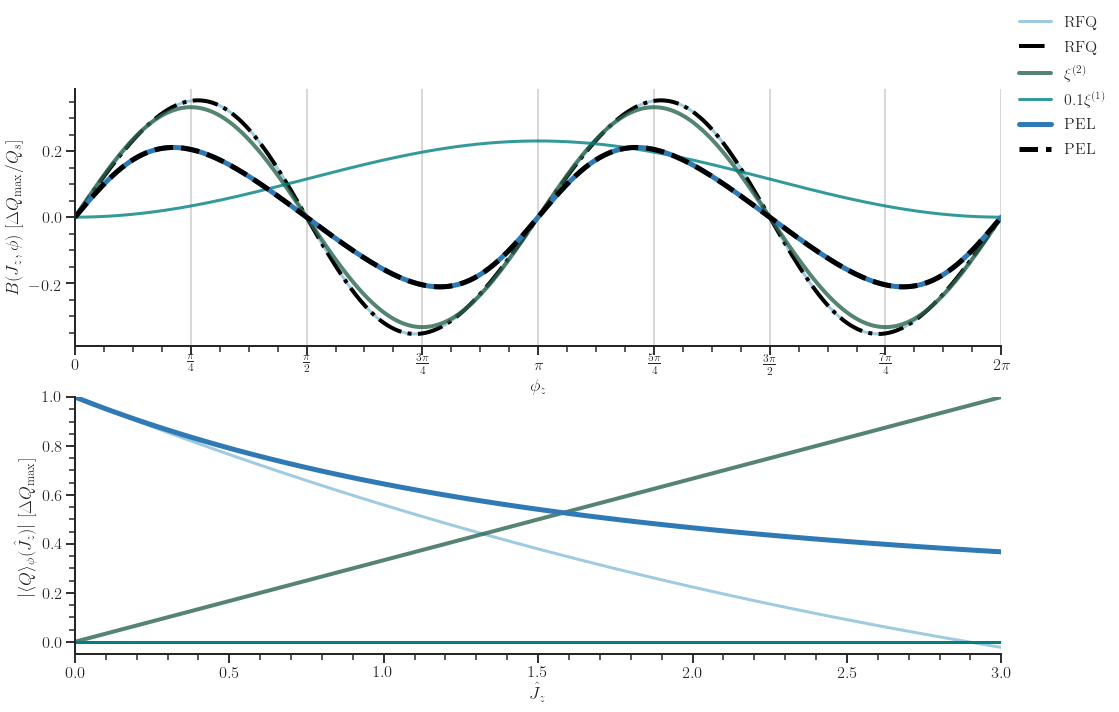

CPU times: user 11.7 s, sys: 40 ms, total: 11.7 s
Wall time: 10.6 s


In [22]:
%%time
from scipy.special import iv, ive
palette = sbs.color_palette('RdBu')
phi = np.linspace(0, 2*pi, 1000)
Jz = np.linspace(0, 3, 100)
J=2
fig, (ax, ax2) = plt.subplots(2, 1)
dQmax=1e-3
ax.plot(phi, -B(B_integrand_RFQ, Jz=J, phi=phi) /
        dQmax,  label='RFQ', color=palette[-2], alpha=0.8)
ax.plot(phi, -RFQ_sum(phi, J_z=J),  label='RFQ', color='black', linewidth=4, linestyle='dashdot')

ax2.plot(Jz, Q_average_detuning_RFQ(Jz) /
        dQmax, color=palette[-2], alpha=0.8)

ax.plot(phi, -B(B_integrand_Qpp, Jz=J, phi=phi) /
        dQmax,  label='$\\xi^{(2)}$', color='#2C664F', alpha=0.8, linewidth=4)
ax2.plot(Jz, np.abs(Q_average_detuning_Qpp(Jz)) /
        dQmax, color='#2C664F', alpha=0.8, linewidth=4)

ax.plot(phi, .1*B(B_integrand_Qp, Jz=J, phi=phi) /
        dQmax,  label='$0.1\\xi^{(1)}$', color='#008080', alpha=0.8)
ax2.axhline(0, color='#008080')

ax.plot(phi, B(B_integrand, Jz=J, phi=phi) /
        dQmax,  label='PEL', color=palette[-1], linewidth=5)

ax.plot(phi, B_sum(phi, J_z=J),  label='PEL', color='black', linewidth=5, linestyle='dashed')
ax2.plot(Jz, Q_average_detuning(Jz) /
        dQmax, color=palette[-1], linewidth=5)

ax.set_xlabel('$\phi_z$')
ax.set_ylabel(
    '$B(J_z, \phi)$ [$\Delta Q_\mathrm{max}/Q_s$]')
ax2.set_xlabel('$\hat{J_z}$')
ax2.set_ylabel(
    '$| \langle Q \\rangle_\phi (\hat{J_z})|$ [$\Delta Q_\mathrm{max}$]')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax.set_xlim(0, 2*pi)
ax2.set_xlim(0, 3)
ax2.set_ylim(-0.05, 1)
ticks = np.linspace(0, 2*pi, 9)
ax.set_xticks(ticks)
ax.minorticks_on()
ax2.minorticks_on()

ax.set_xticklabels(
    ['$0$',
     '$\\frac{\pi}{4}$',
     '$\\frac{\pi}{2}$',
     '$\\frac{3\pi}{4}$',
     '$\pi$',
     '$\\frac{5\pi}{4}$',
     '$\\frac{3\pi}{2}$',
     '$\\frac{7\pi}{4}$',
     '$2\pi$'],)
ax.xaxis.grid()
plt.figlegend(frameon=False)
plt.savefig('/home/vgubaidulin/PhD/Code/Numerical/Stability_diagrams/Results/'+'B.pdf', bbox_inches='tight')
plt.show()

In [84]:
l=0
n=np.linspace(1, 10, 10, dtype=np.int64)
z_1 = 1
z_2 = 0.5
print(np.sum(jv(n, z_2)*(jv(2*n-l, z_1)+(-1)**(l+3*n)*jv(2*n+l, z_1))))

0.0001515902642029054


In [835]:
@np.vectorize
def H(z_1, z_2, l: np.int64 = 0, n_max: np.int64 =20):
    n=np.linspace(-n_max, n_max, 2*n_max+1, dtype=np.int64)
    a = jv(n, z_2)
    b = jv(l+2*n, z_1)
    return 1j**(-l)*np.dot(a, b)

In [810]:
%%timeit
z_1 = np.linspace(-1, 1, 10)
H(z_1, 0, l=1)

1.25 ms ± 40.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [788]:
%%timeit
z_1 = np.linspace(-1, 1, 10)
jv(0, z_1)

27.2 µs ± 1.11 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [617]:
a = np.array([0, 1, 2, 3, 4])
print(np.tile(a, reps=(3, 1)))

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [730]:
from scipy.signal import fftconvolve
Q_x = 20.13
def res_impedance(p, l=0):
    R=1100
    omega_0=c/R
    omega = (p+Q_x+l*Q_s)*omega_0
    Q = 1
    Rs = 1e7
    omega_r = 2*pi*8e8
    return omega_r/omega*Rs/(1-1j*Q*(omega_r/omega-omega/omega_r))
def res_wall(p, l=0):
    omega = (p+Q_x+l*Q_s)*omega_0
    
def K(N):
    N=1e9
    gamma = 27.7
    R=1100
    omega_b = omega_0*Q_x
    T0 = 2*pi*R/c
    E = gamma*m_p*c**2
    return N*e**2*c/(2*omega_b*T0**2*E)
@np.vectorize
def eff_impedance(xi_1, l=0):
    p = np.linspace(-10000, 10000, 200001)
    omega = omega_0*(p+Q_x+l*Q_s)
    beta_z = 115
    J_z = 3e-4
    r = np.sqrt(2*J_z*beta_z)
    x = xi_1/beta_z*Q_x/Q_s
    y = omega/c
#     xg, yg = np.meshgrid(x, y)
    z_1 = r*(x-y)
    print(x)
#     Spectrum = np.abs(H(z_1, 0, l))**2
#     Z = fftconvolve(Spectrum, np.tile(res_impedance(p, l), reps=(xg.shape[1], 1)))
#     Z = np.dot(Spectrum, res_impedance(p, l))
    Z = np.dot(jv(l, z_1)**2, res_impedance(p, l))
    return Z
@np.vectorize
def eff_impedanceb(xi_1, l=0):
    p = np.linspace(-10000, 10000, 20001, dtype=np.int32)
    omega = omega_0*(p+Q_x+l*Q_s)
    beta_z = 115
    J_z = 3e-4
    r = np.sqrt(2*J_z*beta_z)
    x = xi_1/beta_z*Q_x/Q_s
    y = omega/c
#     xg, yg = np.meshgrid(x, y)
    z_1 = r*(x-y)
#     Spectrum = np.abs(jv(l, z_1))**2
    Z = np.dot(np.abs(H(z_1, 0, l))**2, res_impedance(p, l))
#     Z = fftconvolve(Spectrum, np.tile(res_impedance(p, l), reps=(xg.shape[1], 1)))
    return Z
@np.vectorize
def eff_impedance2(xi_2, l=0):
    p = np.linspace(-100000, 100000, 200001)
    omega = omega_0*(p+Q_x+l*Q_s)
    xi_1 = 0.25
    beta_z = 115
    J_z = 3e-4
    r = np.sqrt(2*J_z*beta_z)
    z_1 = r*(xi_1/beta_z*Q_x/Q_s-omega/c)
    z_2 = (r**2/8/beta_z**2*Q_x/Q_s*xi_2)
    Z = np.dot(np.abs(H(z_1, z_2, l))**2, res_impedance(p, l))
    return Z
print(K(0))
eff_impedance(-1)

3.1689620662663657e-10
-10.296675191815854
-10.296675191815854


array(-1.37547155e+11+4.32607613e+11j)

/home/vgubaidulin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

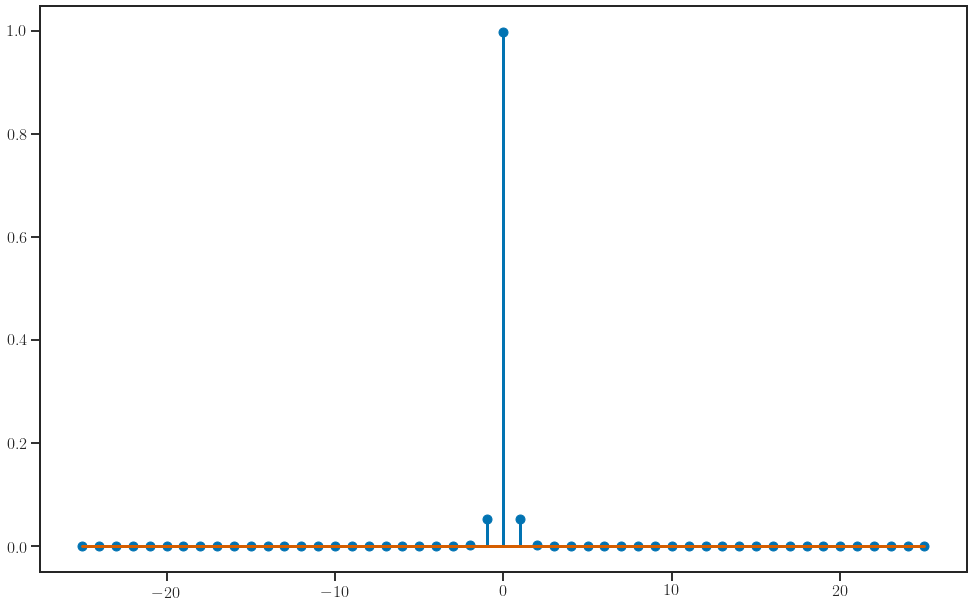

In [731]:
z_2 = .5*ive(1, 1)#np.sqrt(2*beta_z*J_z)*(-np.sqrt(2*beta_z*J_z)/8/beta_z*Q_x/Q_s*xi_2)
fig, ax  = plt.subplots(1, 1)
n = np.linspace(-25, 25, 51, dtype=np.int64)
ax.stem(n, np.abs(jv(n, z_2)))

CPU times: user 3min, sys: 651 ms, total: 3min
Wall time: 2min 54s


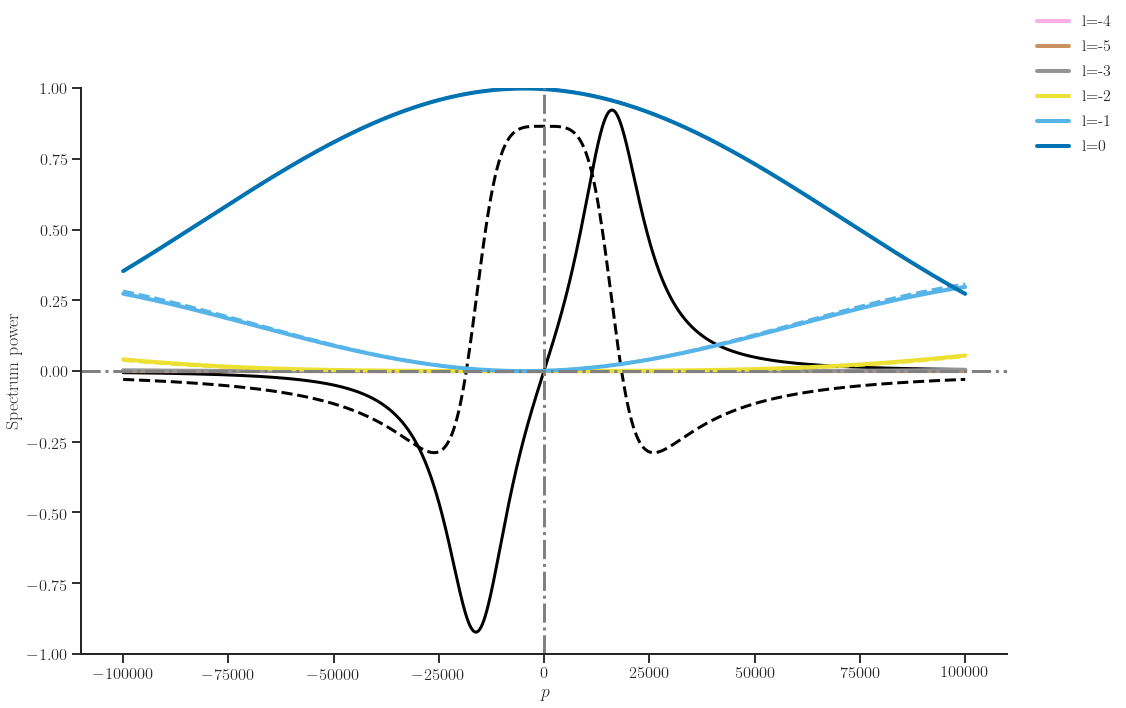

In [780]:
%%time
p = np.linspace(-100000, 100000, 200001)
Q_s = 0.017
fig, ax = plt.subplots(1, 1)

ax.plot(p, np.real(res_impedance(p))/max(np.abs(res_impedance(p))), c='black')
ax.plot(p, np.imag(res_impedance(p))/max(np.abs(res_impedance(p))), c='black', linestyle='dashed')
xi_1 = -0.25
omega = omega_0*(p+Q_x+l*Q_s)
z_1 = np.sqrt(2*beta_z*J_z)*(1/beta_z*Q_x/Q_s*xi_1-omega/c)
# for i, m in enumerate(np.linspace(-3, 0, 4, dtype=np.int64)):
# m = -1
for m in [-4, -5, -3, -2, -1, 0]:
#     xi_2 = -5
    z_2 = 0.147*ive(1, 1)#np.sqrt(2*beta_z*J_z)*(-np.sqrt(2*beta_z*J_z)/8/beta_z*Q_x/Q_s*xi_2)
    ax.plot(p, np.abs(H(z_1, z_2, l=m))**2, c=palette[m], label='l={0:}'.format(m), linewidth=4)
    ax.plot(p, np.abs(jv(m, z_1))**2, color=palette[m], linestyle='dashed', linewidth=3)
ax.set_ylim(-1, 1)
ax.axvline(0, color='grey', linestyle='dashdot')
ax.axhline(0, color='grey', linestyle='dashdot')
# ax.set_xlim(p[0]//2, p[-1]//2)

# ax.axvline(-c/0.06/omega0)
ax.set_xlabel('$p$')
ax.set_ylabel('Spectrum power')
plt.figlegend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [749]:
Zx_real = np.load('/home/vgubaidulin/PhD/Results/Zreal_LHC.npy')
Zx_imag = np.load('/home/vgubaidulin/PhD/Results/Zimag_LHC.npy')
fftfreq = np.load('/home/vgubaidulin/PhD/Results/Zfreq_LHC.npy')

CPU times: user 2min 57s, sys: 306 ms, total: 2min 57s
Wall time: 2min 51s


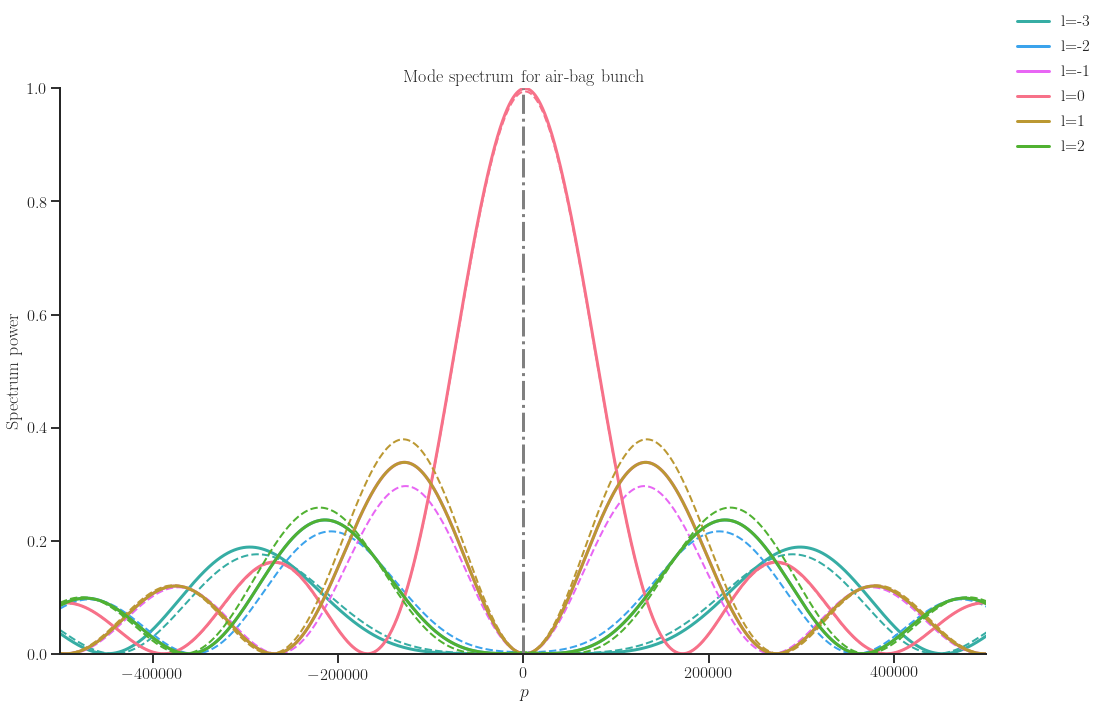

In [923]:
%%time
sbs.set(rc={'figure.figsize': (2*8.3, 2*5.2),
            'text.usetex': True,
            'font.family': 'serif',
            'font.size': 20,
            'axes.linewidth': 2,
            'lines.linewidth': 3,
            'legend.fontsize': 16,
            'legend.numpoints': 1, },
               style='ticks',
        context='talk')
p = np.linspace(-1000000, 1000000, 200001)
Q_s = 1.74e-3
fig, ax = plt.subplots(1, 1)
palette = sbs.color_palette('husl')
# ax.scatter(fftfreq, Zx_real/np.max(Zx_real), c='black', marker='.')
# ax.scatter(fftfreq, Zx_imag/np.max(Zx_imag), c='grey', marker='.')
beta_z = 815
xi_1 = .1
J_z = 0.06**2/(2*beta_z)
omega_0 = 2*pi*c/(26658.883)
Q_x = 60.31
# omega = omega_0*(p+Q_x+l*Q_s)
# omega_xi = omega_0*Q_x*xi_1/(0.00325)
# z_1 = np.sqrt(2*beta_z*J_z)*(omega_xi/c-omega/c)
# for i, m in enumerate(np.linspace(-3, 0, 4, dtype=np.int64)):
# m = -1
H_summed = 0
J_summed = 0
plot_lines = []
for m in range(-3, 3):
    omega = omega_0*(p+Q_x+m*Q_s)
    omega_xi = omega_0*Q_x*xi_1/(0.00325)
    z_1 = np.sqrt(2*beta_z*J_z)*(omega_xi/c-omega/c)
#     H_summed += np.abs(H(z_1, z_2, l=m))**2
#     J_summed += np.abs(jv(m, z_1))**2
    l1 = ax.plot(p, np.abs(jv(m, z_1))**2, color=palette[m],
                 label='l={0:}'.format(m), linestyle='solid',
                 linewidth=3)
#     z_2 = 10*ive(1, 1)
#     l2 = ax.plot(p, np.abs(H(z_1, z_2, l=m))**2, c=palette[m], linewidth=4, linestyle='dotted')
    z_2 = .5*ive(1, 1)
    l3 = ax.plot(p, np.abs(H(z_1, z_2, l=m))**2, c=palette[m], linewidth=2, linestyle='dashed')
#     z_2 = *ive(1, 1)
#     l4 = ax.plot(p, np.abs(H(z_1, z_2, l=m))**2, c=palette[m], linewidth=4)
    plot_lines.append([l1, l3])
ax.set_ylim(-0, 1)
ax.axvline(0, color='grey', linestyle='dashdot')
ax.axhline(0, color='grey', linestyle='dashdot')
ax.set_xlim(-500000, 500000)

ax.set_xlabel('$p$')
ax.set_ylabel('Spectrum power')
ax.title.set_text('Mode spectrum for air-bag bunch')
# legend1 = plt.legend(handles=[l[0] for l in plot_lines], frameon=False, loc='upper right')
# legend2 = plt.legend(handles=plot_lines[0], ['$\Delta Q/Q_{s0}=0',
#                                         '$\Delta Q/Q_{s0}=0.5',
#                                         '$\Delta Q/Q_{s0}=5',
#                                         '$\Delta Q/Q_{s0}=10'], frameon=False, loc='lower right')
plt.figlegend(frameon=False)
# ax.add_artist(legend1)
# ax.add_artist(legend2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

CPU times: user 1.12 s, sys: 0 ns, total: 1.12 s
Wall time: 1.12 s


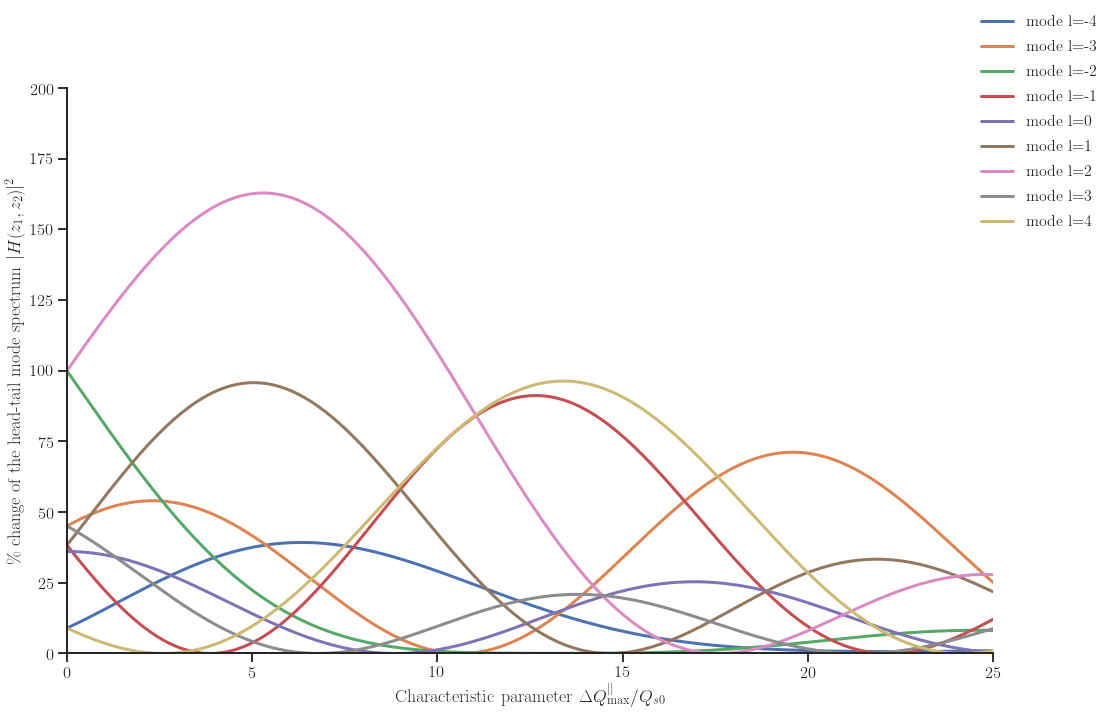

In [920]:
%%time
k = np.linspace(0, 25, 1000)
z_2 = k*ive(1, 1)
p=-210000
xi_1 = 0.5
omega = omega_0*(p+Q_x+l*Q_s)
omega_xi = omega_0*Q_x*xi_1/(0.00325)
z_1 = -np.sqrt(2*beta_z*J_z)*(omega_xi/c-omega/c)
fig, ax = plt.subplots(1, 1)
for m in range(-4, 5):
    N = np.abs(H(z_1, 0, l=-2))**2
    ax.plot(k, 100*np.abs(H(z_1, z_2, l=m))**2/N, label='mode l={0:}'.format(m))
ax.set_xlim(min(k), max(k))
ax.set_ylim(0, 200)
ax.set_xlabel('Characteristic parameter $\Delta Q^\parallel_\mathrm{max}/Q_{s0}$')
ax.set_ylabel('\% change of the head-tail mode spectrum $|H(z_1, z_2)|^2$')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.figlegend(frameon=False)
plt.savefig('/home/vgubaidulin/PhD/Results/LHC_HT_spectrum_l2.pdf')
# plt.xlim(0, 2)

In [896]:
from scipy.constants import c, e, m_p
p = np.linspace(-1000000, 1000000, 200001)
Q_s = 1.74e-3

# ax.scatter(fftfreq, Zx_real/np.max(Zx_real), c='black', marker='.')
# ax.scatter(fftfreq, Zx_imag/np.max(Zx_imag), c='grey', marker='.')
l=0
C = 1083.6
R = C/2/pi
E = 200e6
gamma = 1 + E * e / (m_p * c**2)
beta = np.sqrt(1 - gamma**-2)
print('Relativistic beta: {:.2e}'.format(beta))
eta = -0.67
Q_x = 18.85
sigma_z = .25*58
omega_s = 2*pi*0.703e3
print('Synchrotron frequency: {:.3f} [kHz]'.format(omega_s*1e-3/2/pi))
beta_z = (c*beta*eta)/omega_s
print('Longitudinal beta-function: {:.2e}'.format(beta_z))
xi_1 = -1
z1 = -xi_1/eta*Q_x*2*sigma_z/R

print('Argument of the Bessel function: {:.2e}'.format(z1))
omega_inst = 42e3/2/pi
z_12 = -omega_inst*2*sigma_z/R
print('Impedance argument: {:.2e}'.format(z_12))

Relativistic beta: 5.66e-01
Synchrotron frequency: 0.703 [kHz]
Longitudinal beta-function: -2.57e+04
Argument of the Bessel function: -4.73e+00
Impedance argument: -1.12e+03


In [ ]:
dt_min = 1e-3/c
b1 = 40e-3
res_wall = ResistiveWall(pipe_radius=b1,
                                      resistive_wall_length=C/N_SEGMENTS,
                                      dt_min=dt_min,
                                      conductivity=1.4e6,
                            Yokoya_X1=1.0,
                            Yokoya_Y1=0.,
                            Yokoya_X2=0.,
                            Yokoya_Y2=0.)

0.06560472906350852


ValueError: x and y must have same first dimension, but have shapes (200001,) and (1,)

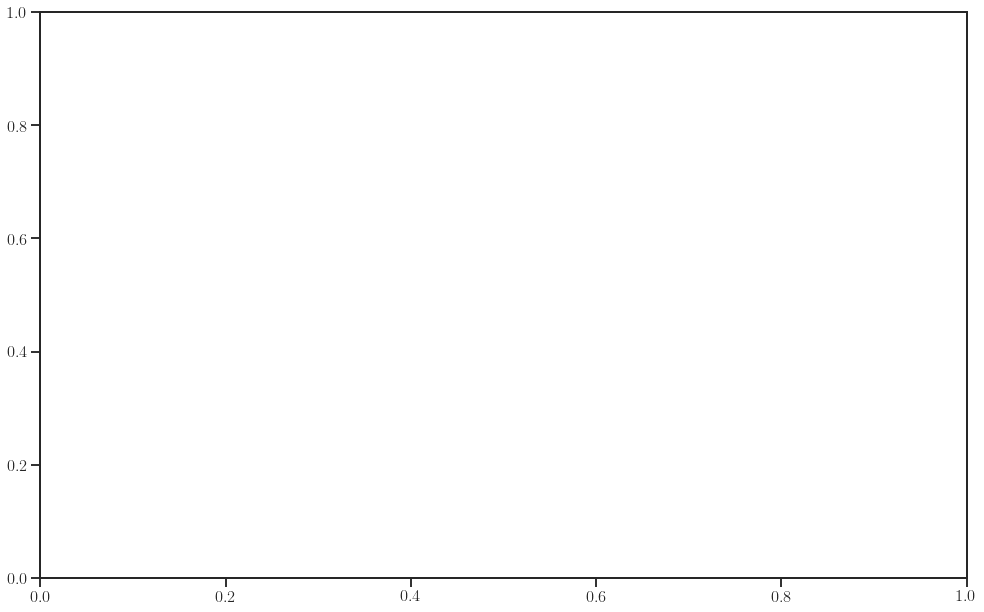

In [831]:
%%time
fig, ax = plt.subplots(1, 1)

xi_1 = 0.25
J_z = 0.06**2/(2*beta_z)
omega_0 = 2*pi*c/(26658.883)
Q_x = 60.31
omega = omega_0*(p+Q_x+l*Q_s)
omega_xi = omega_0*Q_x*xi_1/(0.00325)
z_1 = np.sqrt(2*beta_z*J_z)*(omega_xi/c)#-omega/c)
print(z_1)
# for i, m in enumerate(np.linspace(-3, 0, 4, dtype=np.int64)):
# m = -1
H_summed = 0
J_summed = 0
for m in [-2, -1, 0, 1, 2]:
    z_2 = 10*ive(1, 1)
    H_summed += np.abs(H(z_1, z_2, l=m))**2
    J_summed += np.abs(jv(m, z_1))**2
    ax.plot(p, np.abs(H(z_1, z_2, l=m))**2, c=palette[m], label='l={0:}'.format(m), linewidth=4)
    ax.plot(p, np.abs(jv(m, z_1))**2, color=palette[m], linestyle='dashed', linewidth=3)
ax.set_ylim(-0, 1)
ax.axvline(0, color='grey', linestyle='dashdot')
ax.axhline(0, color='grey', linestyle='dashdot')
# ax.set_xlim(p[0]//2, p[-1]//2)

ax.set_xlabel('$p$')
ax.set_ylabel('Spectrum power')
ax.title.set_text('Mode spectrum for air-bag bunch')
plt.figlegend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [733]:
%%time
from scipy.special import jv, iv
from scipy.constants import c
# beta_z = 115
# J_z = 3e-4
# gamma = 27.7
# omega_0 = c/1100
# Q_s=0.017
# Q_x = 20.13
# xi_2 = np.linspace(-5000, 5000, 10000)
dQmax = 0
# z_2 = xi_2*0.125*2*J_z/beta_z/Q_s
z_2 = -dQmax/Q_s*ive(1, 1)
palette = sbs.color_palette()
m=0
# xi_1 = np.linspace(-.25, 1.5, 100)
xi_1 = np.linspace(-.25, 1.5, 50, dtype=np.float64)
# Zeff = eff_impedance(xi_1, l=m)
Zeffb = eff_impedanceb(xi_1, l=m)

CPU times: user 1min 42s, sys: 485 ms, total: 1min 42s
Wall time: 1min 13s


CPU times: user 12h 54min 7s, sys: 41.4 s, total: 12h 54min 49s
Wall time: 12h 43min 56s


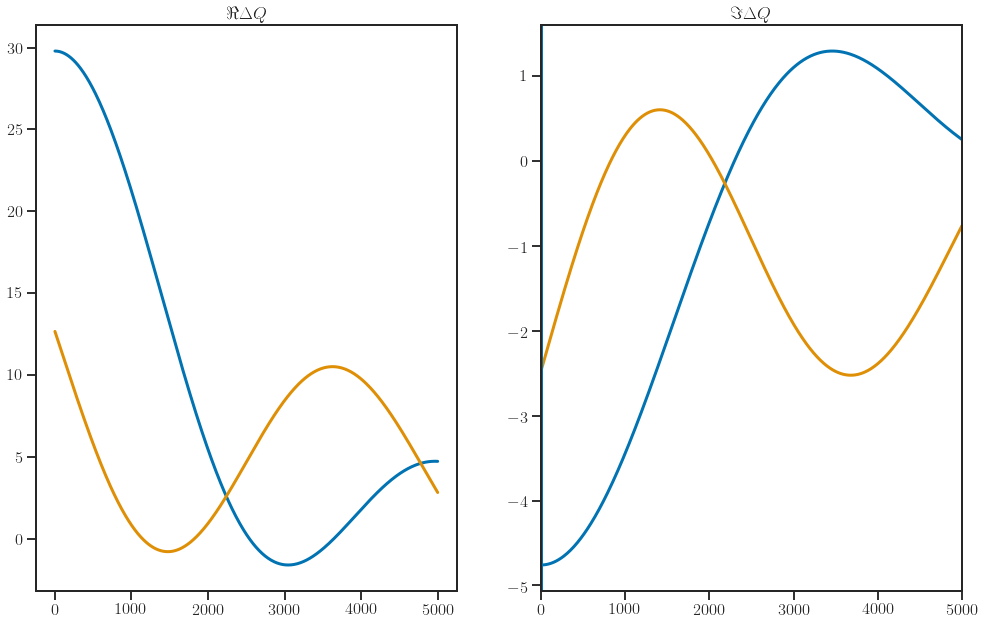

In [695]:
%%time
# Zeff *= K(0)
fig, (ax1, ax2) = plt.subplots(1, 2)
for m in [0, 1]:
# xi_1 = np.linspace(-.25, 1.5, 100)
#     xi_1 = np.linspace(-.25, 1.5, 50)
    # xi_2 = np.linspace(0, 5000, 200)
    xi_2 = np.linspace(0, 5000, 500)
    
    Zeff = K(0)*eff_impedance2(xi_2, l=m)
#     Zeffb = K(0)*eff_impedanceb(xi_1, l=m)
#     for Zeffx in [Zeff, Zeffb]:
    ax1.plot(xi_2,
             np.real(-1j*Zeff),
             label='Azimuthal mode $l={0}$'.format(m))
# plt.xlim(-.25, 1.5)
    ax2.plot(xi_2,
             np.imag(-1j*Zeff),
             label='Azimuthal mode $l={0}$'.format(m))
    ax2.set_title('$\Im\Delta Q$')
    ax1.set_title('$\Re\Delta Q$')
    ax2.axvline(0)
    ax2.set_xlim(0, 5000)
#     ax2.set_xlim(-0.25, 1.5)
# ax2.set_ylim(0, .15)

## SIS100 impedance model
|Element| Horizontal Diameter $2b_x$ [mm] | Vertical diameter $2b_y$  [mm]| Wall thickness $d_{pipe}$ [mm] | Length $L$ [m]|
| --- | --- | --- | --- | --- |
| Quadrupole Chambers | 143.44 | 65.21 | 0.3 | 282.5 |
| Dipole Chambers | 120 | 60 | 0.3 | 272.6 |
| Drift Spaces | 135 | 65 | 3 | 428.48 | 
For an round pipe equivalent one can replace: $$2b^2 = b_{x,y}(b_x+b_y)$$

Taken from https://web-docs.gsi.de/~kornilov/pdfs/Impedances_SIS100.pdf

In [655]:
L1, L2, L3 = 282.5, 272.6, 428.48
d1, d2, d3 = 0.3e-3, 0.3e-3, 3e-3
by1, by2, by3 = 0.5*65.21e-3, 0.5*60e-3, 0.5*65e-3
bx1, bx2, bx3 = 0.5*143.44e-3, 0.5*120e-3, 0.5*135e-3
b1 = np.sqrt(0.5*by1*(bx1+by1))
b2 = np.sqrt(0.5*by2*(bx2+by2))
b3 = np.sqrt(0.5*by3*(bx3+by3))
print('Beam pipe radii (cicrular beam pipe approximation) for elements listed in the table:\n {0:.2f}, {1:.2f}, {2:.2f} [mm]'.format(
b1*1e3, b2*1e3, b3*1e3))


Beam pipe radii (cicrular beam pipe approximation) for elements listed in the table:
 41.24, 36.74, 40.31 [mm]
